In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from functools import reduce
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve,plot_confusion_matrix, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier


In [85]:
#load feature_data
X = pd.read_csv("feature_data.csv")
#load_label_data
y = pd.read_csv("label_data.csv")
#change_column_names
X = df.rename(columns = {'Unnamed: 0':'id'})
y = df1.rename(columns = {'Unnamed: 0':'id'})
#merge_data
new_df=pd.merge(X,y,on=['id'])
new_df.head()

,id,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13,cancelation
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0,True
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN,False
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN,False
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN,False
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN,False


In [86]:
#basic data info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89542 entries, 0 to 89541
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   89542 non-null  int64  
 1   time_until_order     76861 non-null  float64
 2   order_year           89542 non-null  int64  
 3   order_month          86108 non-null  object 
 4   order_week           89542 non-null  object 
 5   order_day_of_month   89542 non-null  int64  
 6   adults               89542 non-null  int64  
 7   children             89538 non-null  float64
 8   babies               89542 non-null  int64  
 9   country              85201 non-null  object 
 10  order_type           89542 non-null  object 
 11  acquisition_channel  89542 non-null  object 
 12  prev_canceled        89542 non-null  int64  
 13  prev_not_canceled    89542 non-null  int64  
 14  changes              86065 non-null  float64
 15  deposit_type         80536 non-null 

In [87]:
#empty_val_stats - 
new_df.isnull().sum()
total = new_df.isnull().sum()
percent_missing = new_df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'total': total,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,total,percent_missing
company,84480,94.346787
anon_feat_13,83766,93.549396
time_until_order,12681,14.162069
agent,12196,13.620424
customer_type,9895,11.050680
deposit_type,9006,10.057850
anon_feat_11,4957,5.535950
country,4341,4.848004
anon_feat_7,4248,4.744142
anon_feat_6,4233,4.727390


In [88]:
#Split numerical and categorial data
X_num = new_df.select_dtypes(include=[np.number])
X_categ = new_df.select_dtypes(exclude=[np.number])


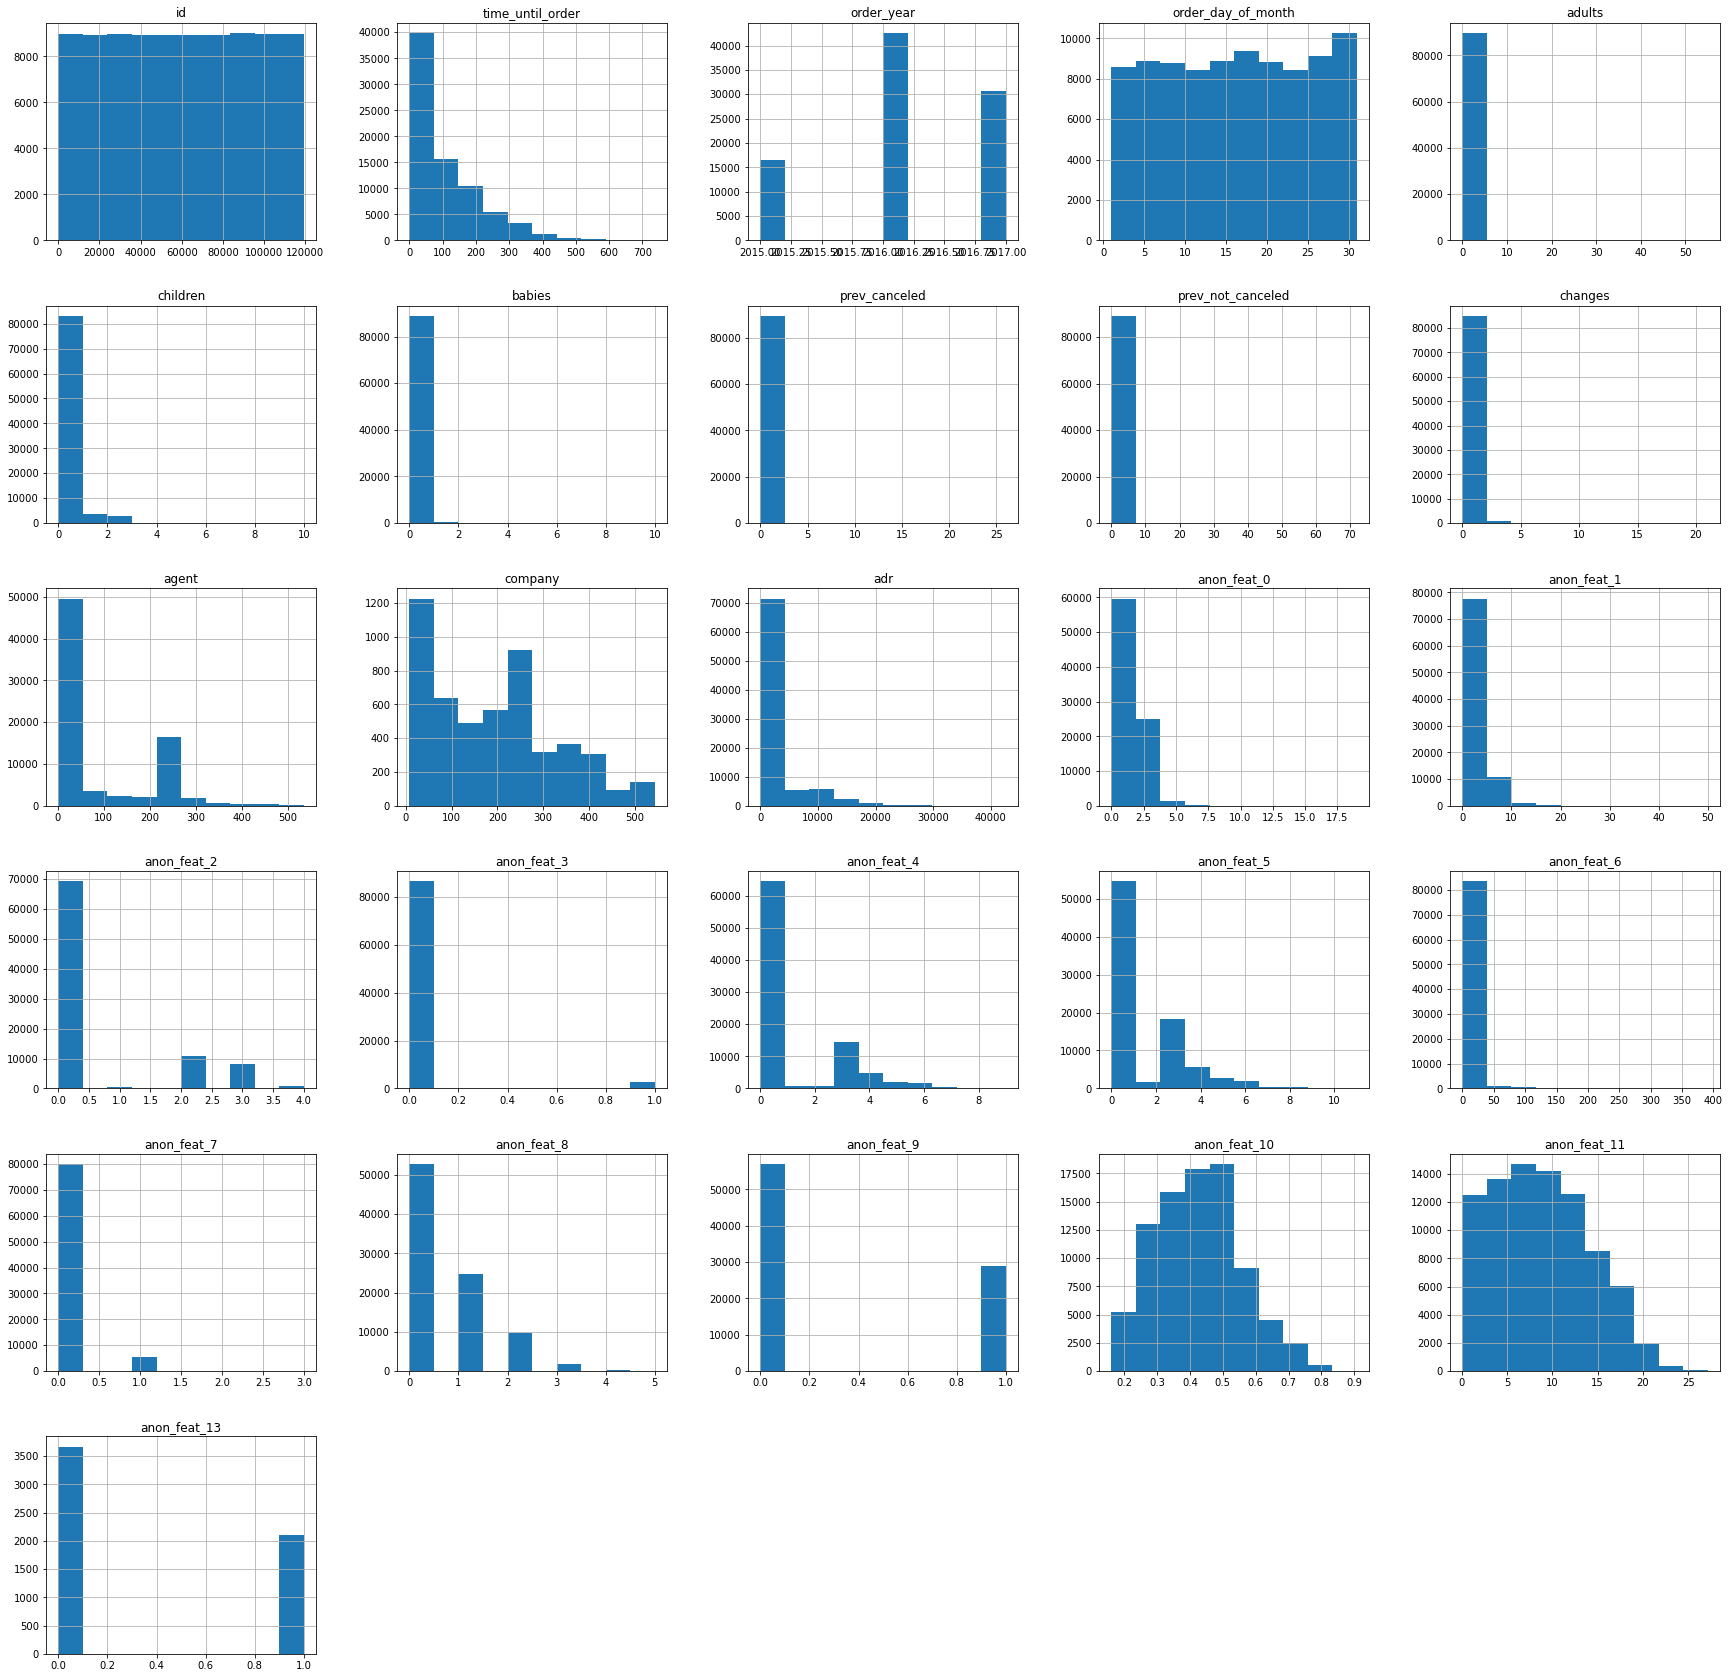

In [89]:
#Feature_histogram
X_num.hist(figsize=(30,30))
plt.show()

<AxesSubplot:>

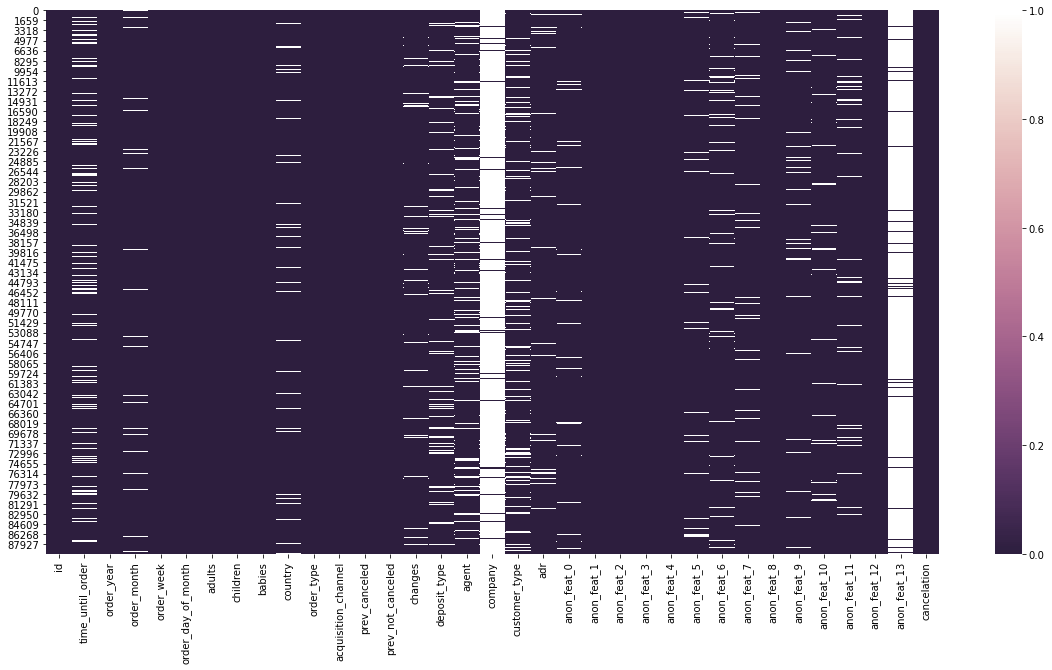

In [90]:
#plot null values per row
%matplotlib inline
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(new_df.isnull(), cmap=cmap)

In [91]:
#drop null columns
new_df.drop(['company','anon_feat_13'], axis=1, inplace = True)

# plot null values after drop of 2 columns

<AxesSubplot:>

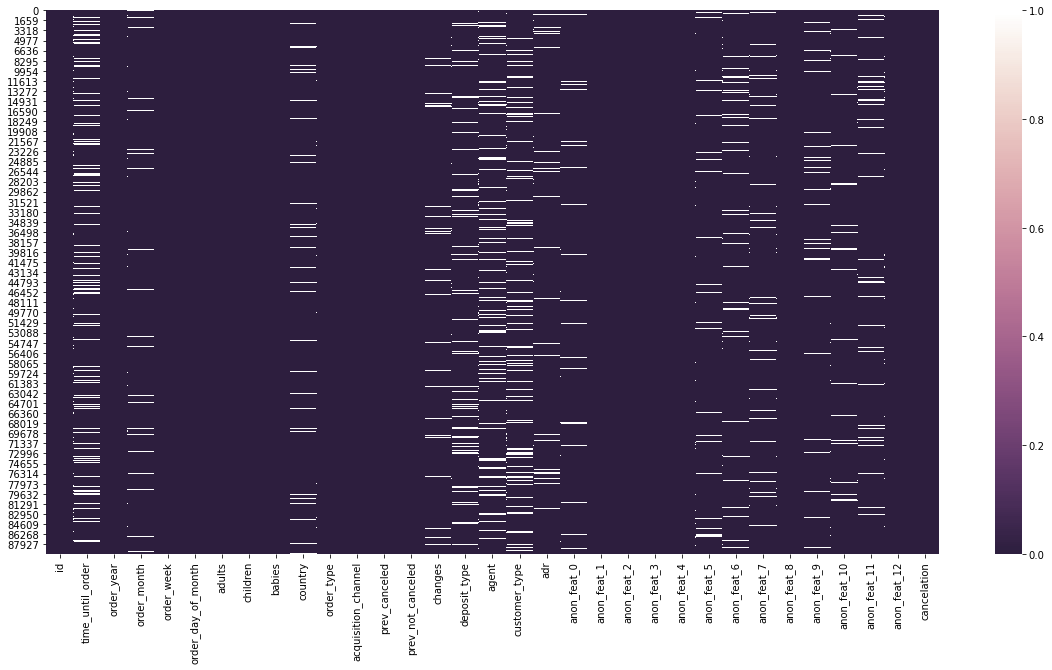

In [92]:
#plot null values per row - After drop
%matplotlib inline
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(new_df.isnull(), cmap=cmap)

In [93]:
# we need to decide if to fillna before we do correlation heatmap or after
# fix categorial vs numerical
# fillna according to outliers in numerical - mean/median
# outliers visulaization - boxplot
# correlation heatmap
# pca


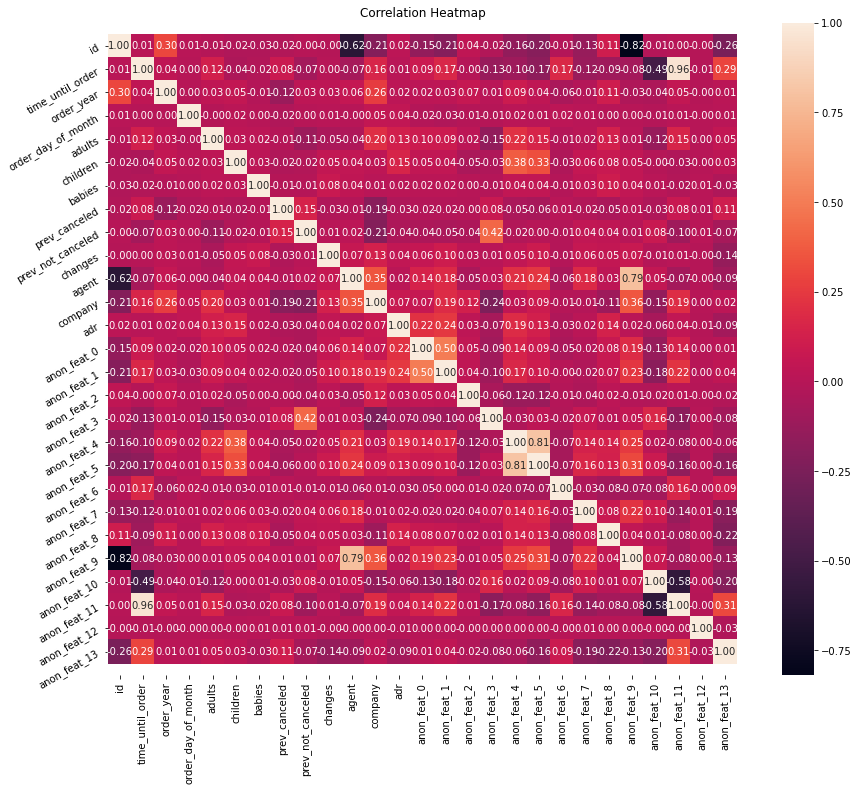

In [94]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)                 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

# We see high correlation between time_until_order to anon_feat_11
# We see high correlation between agent and anon_feat_9
# We see high correlation between anon_feat_4 and anon_feat_5
# We see low correlation between anon_feat_10 and anon_feat_11

In [96]:
y1=new_df.cancelation
X.corrwith(y1).sort_values(ascending=False)

anon_feat_13          1.000000
anon_feat_11          0.313919
time_until_order      0.294502
prev_canceled         0.109633
anon_feat_6           0.058219
adults                0.058103
anon_feat_1           0.026997
order_year            0.014949
children              0.005691
anon_feat_0          -0.000038
anon_feat_12         -0.004417
order_day_of_month   -0.006737
company              -0.012482
anon_feat_2          -0.016972
babies               -0.032331
prev_not_canceled    -0.060068
anon_feat_4          -0.060772
adr                  -0.070436
agent                -0.081911
anon_feat_3          -0.085612
anon_feat_9          -0.136527
changes              -0.144559
anon_feat_5          -0.176803
anon_feat_7          -0.197533
anon_feat_10         -0.204077
anon_feat_8          -0.233985
id                   -0.242871
dtype: float64

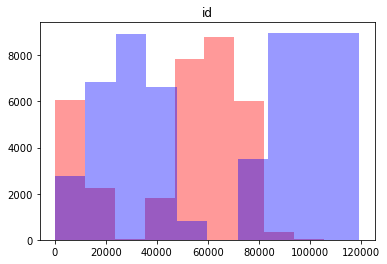

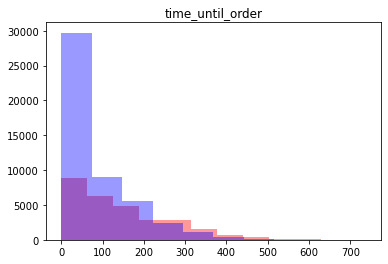

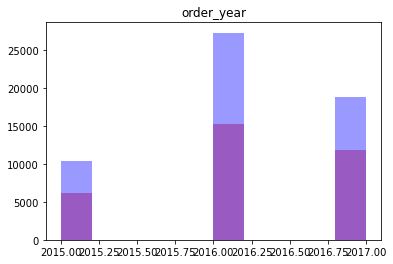

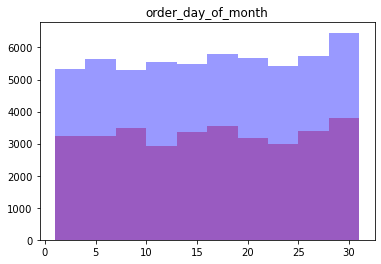

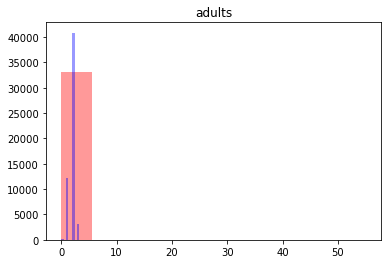

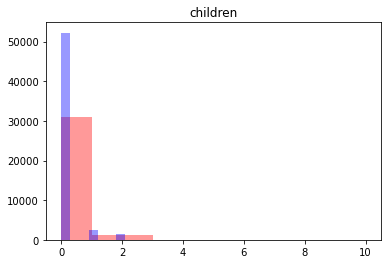

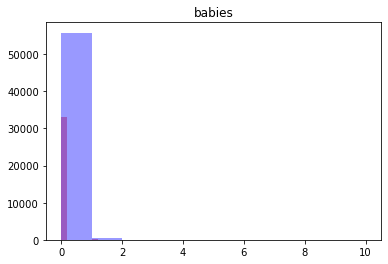

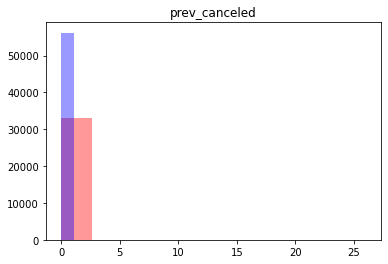

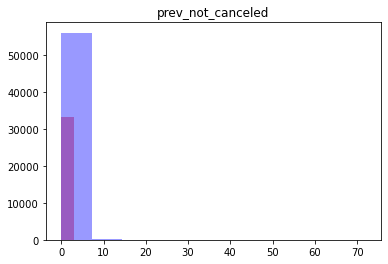

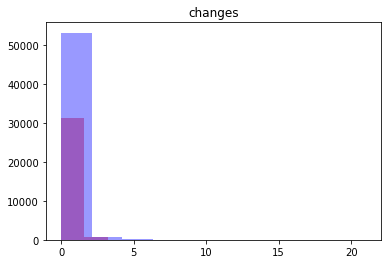

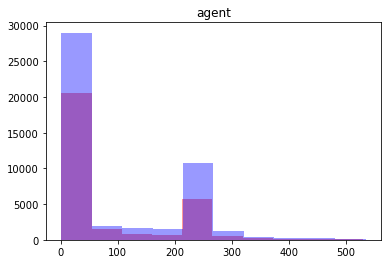

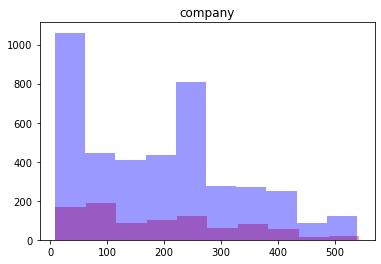

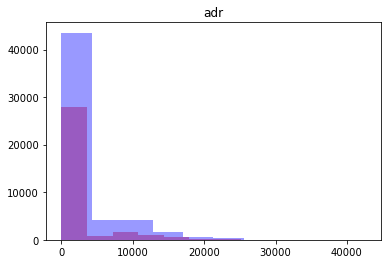

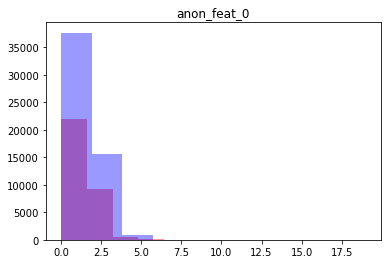

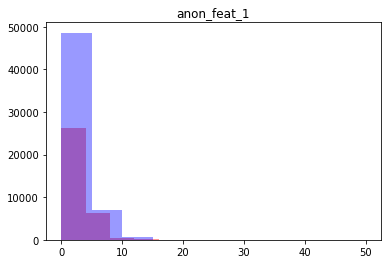

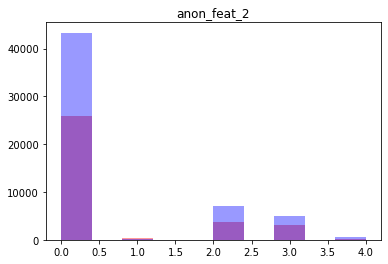

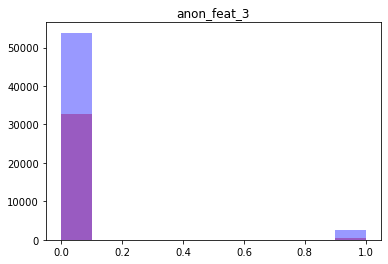

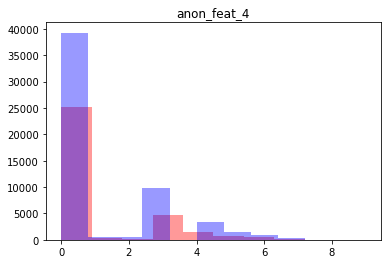

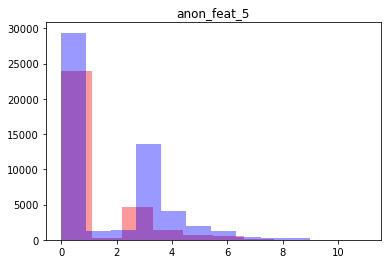

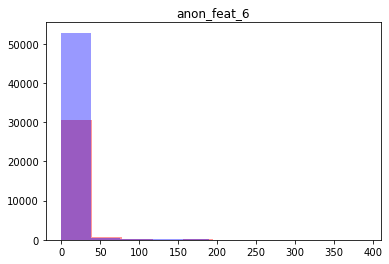

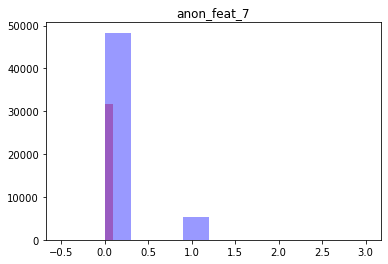

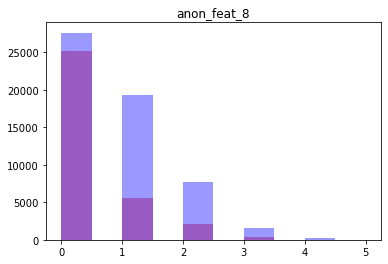

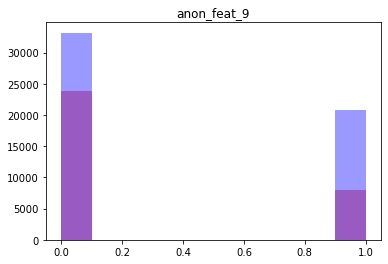

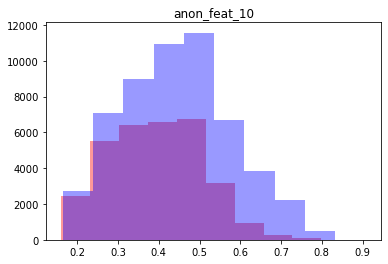

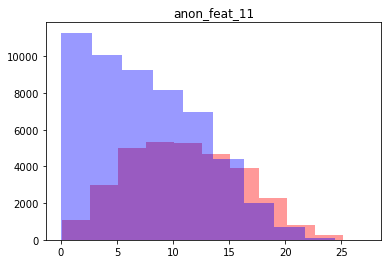

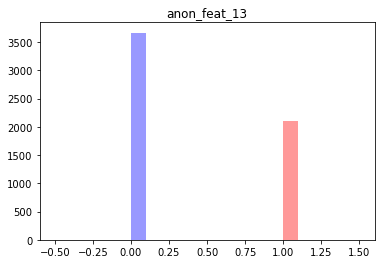

In [98]:
#Distribution of pos and neg labels by feautre
for col in X_num.columns:
    pos = X_num[col][y1.astype(bool)]
    neg = X_num[col][~y1.astype(bool)]
    plt.hist(pos,color ='r', alpha=0.4, label='Positive')
    plt.hist(neg, color='b', alpha=0.4, label ='Negative')
    plt.title(col)
    plt.show()